# Instore Prices

Find a dedicated note in obsidian - Instore prices

## Config

In [1]:
import matplotlib.pyplot as  plt
# import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path.append('c:\\Users\\Jordi Cremades\\Documents\\Repos\\central-node')

# from utils import dataset_meta_stats
# from utils import dataset_stats
from utils import query_engines

# dms = dataset_meta_stats.DatasetMetaStats() 
# ds = dataset_stats.DatasetStats()

## [X] Task 1: All countries CVR%

In [ ]:
START_DATE = "'2023-12-01'"
END_DATE = "'2024-05-01'"

LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
] 

q = query_engines.QueryEngines(
    query='instore_prices.sql',
    params=params,
    printq=None,
    output_file='instore_prices_all_countries'
    
)

df = q.query_run_starbust()
df

In [4]:
# tune it
df['ipg_variant_v2'] = df['ipg_variant'].fillna('not-found')
df['nswg_variant_v2'] = df['nswg_variant'].fillna('not-found')
df['cvr_ce_or'] = df['oe_events']/df['ce_events']

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23268\4108178380.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df[cond], x='p_creation_date', y='cvr_ce_or', hue='ipg_variant_v2', linestyle='-', ci=None)
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23268\4108178380.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[cond], x='p_creation_date', y='cvr_ce_or', hue='ipg_variant_v2', linestyle='-', ci=None)


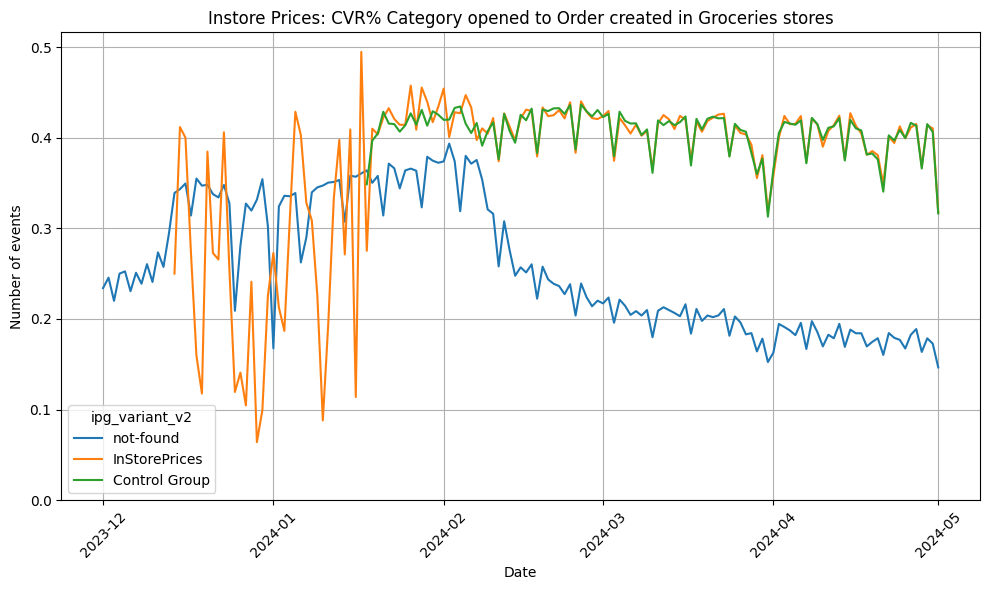

In [5]:
cond = df['nswg_variant_v2'] == 'Variant 1'

df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
# Sort DataFrame by 'p_creation_date'
df = df.sort_values('p_creation_date')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[cond], x='p_creation_date', y='cvr_ce_or', hue='ipg_variant_v2', linestyle='-', ci=None)
plt.title('Instore Prices: CVR% Category opened to Order created in Groceries stores')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23268\2675654672.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df[cond], x='p_creation_date', y='oe_events', hue='ipg_variant_v2', linestyle='-', ci=None)
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_23268\2675654672.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df[cond], x='p_creation_date', y='oe_events', hue='ipg_variant_v2', linestyle='-', ci=None)


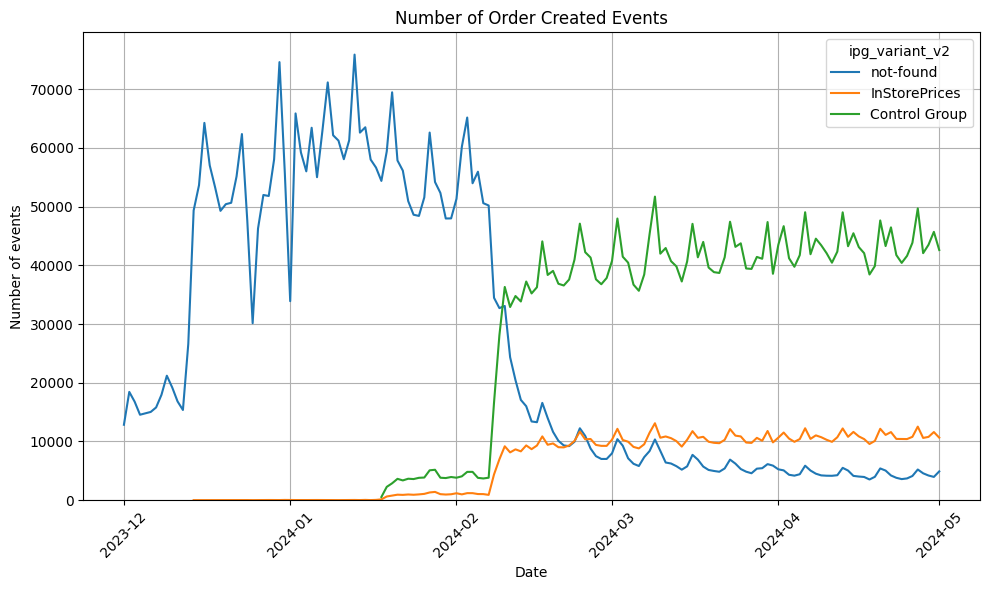

In [6]:
cond = df['nswg_variant_v2'] == 'Variant 1'

df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])
# Sort DataFrame by 'p_creation_date'
df = df.sort_values('p_creation_date')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[cond], x='p_creation_date', y='oe_events', hue='ipg_variant_v2', linestyle='-', ci=None)
plt.title('Number of Order Created Events')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## [X] Task 2: CVR% country level

In [4]:
START_DATE = "'2023-12-01'"
END_DATE = "'2024-05-01'"

LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q = query_engines.QueryEngines(
    query='instore_prices_country_level.sql',
    params=params,
    printq=None,
    output_file='instore_prices_country_level',
    load_from_output_file='instore_prices_country_level'
)

df = q.query_run_starbust()
df

,country,nswg_variant,ipg_variant,p_creation_date,ce_events,oe_events
0,AD,Control Group,NaN,2023-12-01,3,0
1,AD,Control Group,NaN,2023-12-04,1,0
2,AD,Control Group,NaN,2023-12-05,1,0
3,AD,Control Group,NaN,2023-12-06,1,0
4,AD,Control Group,NaN,2023-12-08,6,0
...,...,...,...,...,...,...
16462,NaN,Variant 1,NaN,2024-02-02,1,0
16463,NaN,Variant 1,NaN,2024-04-08,1,0
16464,NaN,NaN,NaN,2024-02-20,4,0
16465,NaN,NaN,NaN,2024-03-03,1,0


In [5]:
# tune it
df['ipg_variant_v2'] = df['ipg_variant'].fillna('not-found')
df['nswg_variant_v2'] = df['nswg_variant'].fillna('not-found')
df['cvr_ce_or'] = df['oe_events']/df['ce_events']

# drop columns where country is null
df = df.dropna(subset=['country']) 

# sort values by country
df.sort_values(by='country', inplace=True)

# drop columns not used
df = df.drop(columns=['nswg_variant', 'ipg_variant'])
df.head()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\1881450208.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='country', inplace=True)


,country,p_creation_date,ce_events,oe_events,ipg_variant_v2,nswg_variant_v2,cvr_ce_or
0,AD,2023-12-01,3,0,not-found,Control Group,0.0
35,AD,2023-12-18,10,0,not-found,Variant 1,0.0
36,AD,2023-12-19,2,0,not-found,Variant 1,0.0
37,AD,2023-12-20,3,0,not-found,Variant 1,0.0
38,AD,2023-12-21,4,0,not-found,Variant 1,0.0


In [6]:
# what are the most relevant countries in terms of order_created_events
df_grouped = df.groupby('country')['oe_events'].sum().reset_index()

df_grouped.sort_values(by='oe_events', ascending=False).head()

,country,oe_events
6,ES,2720964
20,RO,1585459
24,UA,1213904
10,IT,916651
18,PL,894874


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_4136\3993902415.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_4136\3993902415.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant_v2')['cvr_ce_or'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


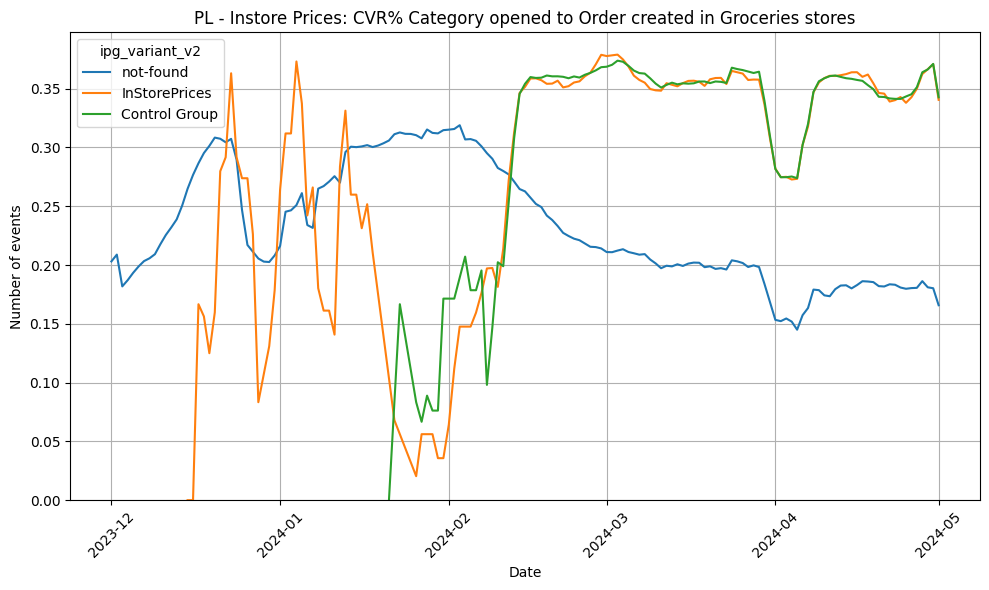

In [42]:
WINDOW = 7
COUNTRY = 'PL'

cond = df['nswg_variant_v2'] == 'Variant 1'
cond2 = df['country'] == COUNTRY


tmp_df = df[cond & cond2]

# Sort DataFrame by 'p_creation_date'
tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])

# Calculate the rolling average of 'cvr_ce_or' column for the last 7 days, grouped by 'ipg_variant_v2'
tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant_v2')['cvr_ce_or'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp_df, x='p_creation_date', y='rolling_avg_7_days', hue='ipg_variant_v2', linestyle='-', errorbar=None)
plt.title(f'{COUNTRY} - Instore Prices: CVR% Category opened to Order created in Groceries stores')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## [X] Task 3: Sessions country level

In [48]:
START_DATE = "'2024-03-01'"
END_DATE = "'2024-06-01'"

LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q = query_engines.QueryEngines(
    query='sessions_country_level.sql',
    params=params,
    printq=None,
    output_file='sessions_country_level',
    load_from_output_file='sessions_country_level'
)

df = q.query_run_starbust()
df

,country,nswg_variant,ipg_variant,p_creation_date,h_sessions,h_customers
0,IT,Variant 1,Control Group,2024-04-22,55513,43935
1,PT,Variant 1,NaN,2024-04-03,56530,48845
2,PT,Variant 1,Control Group,2024-05-08,30886,24087
3,KZ,Variant 1,NaN,2024-03-22,19081,16918
4,KZ,Variant 1,Control Group,2024-04-26,14605,11251
...,...,...,...,...,...,...
16872,RO,NaN,InStorePrices,2024-05-14,14,14
16873,NaN,NaN,InStorePrices,2024-04-29,10,9
16874,KZ,NaN,InStorePrices,2024-05-04,3,3
16875,SI,NaN,InStorePrices,2024-04-14,3,3


In [49]:
# tune it
df['ipg_variant'] = df['ipg_variant'].fillna('not-found')
df['nswg_variant'] = df['nswg_variant'].fillna('not-found')
df['sessions_per_customer'] = df['h_sessions']/df['h_customers']

# drop columns where country is null
df = df.dropna(subset=['country']) 

# sort values by country
df.sort_values(by='country', inplace=True)

# drop columns not used
df.head()

C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\3419594047.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='country', inplace=True)


,country,nswg_variant,ipg_variant,p_creation_date,h_sessions,h_customers,sessions_per_customer
6465,AD,Variant 1,Control Group,2024-03-08,6,6,1.000000
1116,AD,Variant 1,InStorePrices,2024-04-26,8,7,1.142857
455,AD,Control Group,not-found,2024-05-11,26,22,1.181818
8861,AD,Variant 1,InStorePrices,2024-03-19,1,1,1.000000
2066,AD,Control Group,not-found,2024-05-16,16,14,1.142857


In [50]:
# what are the most relevant countries in terms of order_created_events
df_grouped = df.groupby('country')['h_sessions'].sum().reset_index()

df_grouped.sort_values(by='h_sessions', ascending=False).head()

,country,h_sessions
8,ES,48087097
13,IT,25138317
24,RO,18739615
22,PL,17253044
29,UA,14266208


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\791348732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\791348732.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant')['sessions_per_customer'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


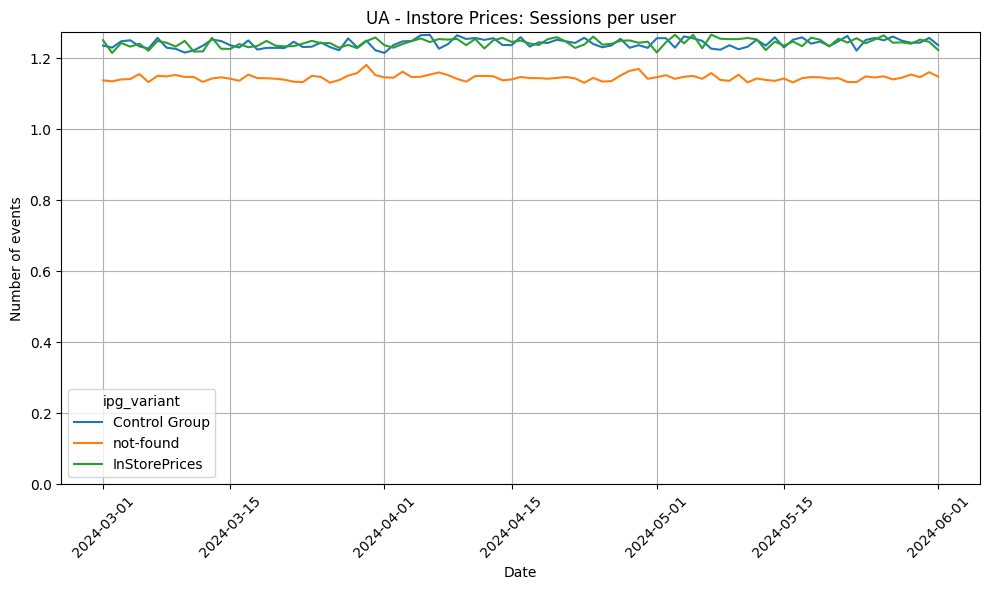

In [56]:
WINDOW = 7
COUNTRY = 'UA'

cond = df['nswg_variant'] == 'Variant 1'
cond2 = df['country'] == COUNTRY


tmp_df = df[cond & cond2]

# Sort DataFrame by 'p_creation_date'
tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])

# Calculate the rolling average of 'cvr_ce_or' column for the last 7 days, grouped by 'ipg_variant_v2'
tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant')['sessions_per_customer'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp_df, x='p_creation_date', y='rolling_avg_7_days', hue='ipg_variant', linestyle='-', errorbar=None)
plt.title(f'{COUNTRY} - Instore Prices: Sessions per user')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## [X] Task 4: AOV country level

In [37]:
START_DATE = "'2024-03-01'"
END_DATE = "'2024-06-01'"

LIST_CATEGORY_ID = [4, 540, 622, 679, 682, 762, 875, 1015, 1082, 1195, 1197, 1214, 1314, 1316, 1551, 1718]
list_category_id = ",".join(str(val) for val in LIST_CATEGORY_ID)

params = [
    # category_id
    {'name':'list_category_id', 'value':list_category_id},
    # dates
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)}
]

q = query_engines.QueryEngines(
    query='aov_country_level.sql',
    params=params,
    printq=None,
    output_file='aov_country_level',
    load_from_output_file='aov_country_level'
)

df = q.query_run_starbust()
df

,order_country_code,nswg_variant,ipg_variant,p_creation_date,n_orders,aov,n_rows
0,MA,Control Group,NaN,2024-04-16,755,10569.097196,755
1,UA,Variant 1,NaN,2024-04-20,1240,13008.122385,1240
2,GE,Variant 1,NaN,2024-05-03,929,17724.171867,929
3,BG,Variant 1,Control Group,2024-05-24,697,18203.205411,697
4,RO,NaN,Control Group,2024-03-02,455,10396.427164,455
...,...,...,...,...,...,...,...
12594,BG,Variant 1,InStorePrices,2024-03-09,13,296.563831,13
12595,BA,NaN,NaN,2024-05-24,6,5.103763,6
12596,SI,Variant 1,InStorePrices,2024-05-04,6,96.890000,6
12597,RO,NaN,Control Group,2024-04-16,2,22.086177,2


In [38]:
# tune it
df['ipg_variant'] = df['ipg_variant'].fillna('not-found')
df['nswg_variant'] = df['nswg_variant'].fillna('not-found')
df['aov'] = df['aov']/df['n_orders']

# drop columns where country is null
df = df.dropna(subset=['order_country_code']) 

# sort values by country
df.sort_values(by='order_country_code', inplace=True)

# drop columns not used
df.head()

,order_country_code,nswg_variant,ipg_variant,p_creation_date,n_orders,aov,n_rows
11361,AM,Control Group,not-found,2024-04-27,14,25.550633,14
2153,AM,Variant 1,not-found,2024-05-31,28,15.670828,28
8800,AM,Variant 1,not-found,2024-03-14,29,22.520925,29
12238,AM,not-found,InStorePrices,2024-03-24,7,24.806785,7
11189,AM,Variant 1,Control Group,2024-03-20,30,14.199606,30


In [41]:
# what are the most relevant countries in terms of order_created_events
df_grouped = df.groupby('order_country_code')['n_orders'].sum().reset_index()

df_grouped.sort_values(by='n_orders', ascending=False).head()

,order_country_code,n_orders
4,ES,1999585
16,PL,1170542
18,RO,1099859
12,MA,789920
22,UA,768555


C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\106339353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])
C:\Users\Jordi Cremades\AppData\Local\Temp\ipykernel_11716\106339353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant')['aov'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


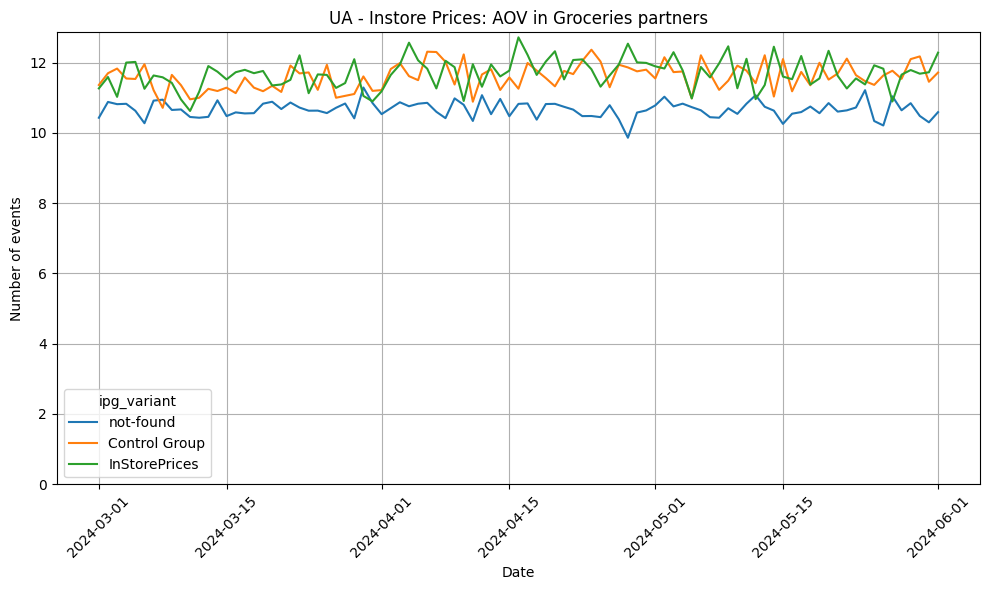

In [47]:
WINDOW = 7
COUNTRY = 'UA'

cond = df['nswg_variant'] == 'Variant 1'
cond2 = df['order_country_code'] == COUNTRY


tmp_df = df[cond & cond2]

# Sort DataFrame by 'p_creation_date'
tmp_df['p_creation_date'] = pd.to_datetime(tmp_df['p_creation_date'])

# Calculate the rolling average of 'cvr_ce_or' column for the last 7 days, grouped by 'ipg_variant_v2'
tmp_df['rolling_avg_7_days'] = tmp_df.groupby('ipg_variant')['aov'].transform(lambda x: x.rolling(window=WINDOW, min_periods=1).mean())


# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=tmp_df, x='p_creation_date', y='rolling_avg_7_days', hue='ipg_variant', linestyle='-', errorbar=None)
plt.title(f'{COUNTRY} - Instore Prices: AOV in Groceries partners')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()